# Лабораторная работа №6: Исследования с моделями классификации

## 1. Выбор начальных условий

### Набор данных

Oxford 102 Flower Dataset

Задача: автоматизировать определение видов растений по снимку

In [2]:
!pip install kaggle
!pip install pandas

  Using cached kaggle-1.7.4.2-py3-none-any.whl.metadata (16 kB)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
Using cached kaggle-1.7.4.2-py3-none-any.whl (173 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [kaggle]
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
!kaggle datasets download -d nunenuh/pytorch-challange-flower-dataset -p data --unzip

Dataset URL: https://www.kaggle.com/datasets/nunenuh/pytorch-challange-flower-dataset
License(s): CC0-1.0
^C


In [9]:
%pip install torch
%pip install torchvision

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pygost-5.13-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 16.4 MB/s eta 0:00:0000:0100:01
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pygost-5.13-py3.11.egg is deprecated. pip 24.3 will enforce thi

In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.ImageFolder(root="data/dataset/train", transform=transform)
val_data = datasets.ImageFolder(root="data/dataset/valid", transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

print("classes -", train_data.classes)
print("train total:", len(train_data))
print("val total:", len(val_data))


classes - ['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
train total: 6552
val total: 818


In [13]:
%pip install matplotlib


DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pygost-5.13-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


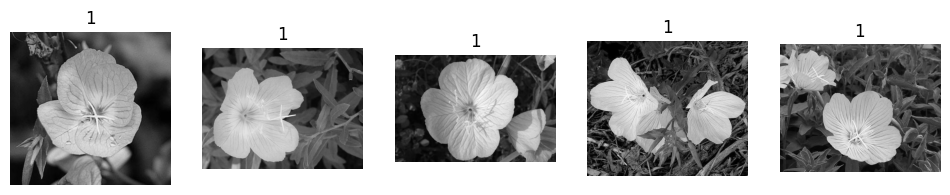

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img.numpy().squeeze()
    plt.imshow(img, cmap="gray")
    plt.axis("off")

fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i in range(5):
    img, label = train_data[i]
    axes[i].imshow(img.numpy().squeeze(), cmap="gray")
    axes[i].set_title(train_data.classes[label])
    axes[i].axis("off")
plt.show()

### Выбор метрики

В качестве метрики качества будем использовать accuracy - как показатель верно угаданных классов.

## 2. Создание бейзлайна и оценка качества

### Обучение сверточной модели

In [7]:
%pip install torch torchvision --index-url https://download.pytorch.org/whl/cu118
%pip install timm

Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 6.6 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 6.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [timm]3/4 [timm]ngface_hub]
Note: you may need to restart the kernel to use updated packages.


In [1]:
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch
from tqdm import tqdm

criterion = nn.CrossEntropyLoss()

if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

def train_one_epoch(model, loader, optimizer):
    model.train()
    running_loss = 0
    running_corrects = 0
    for imgs, labels in tqdm(loader, desc="train", leave=False):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * imgs.size(0)
        running_corrects += (outputs.argmax(1)==labels).sum().item()
    epoch_loss = running_loss / len(loader.dataset)
    epoch_acc  = running_corrects / len(loader.dataset)
    return epoch_loss, epoch_acc

def validate(model, loader):
    model.eval()
    running_loss = 0
    running_corrects = 0
    with torch.no_grad():
        for imgs, labels in tqdm(loader, desc="val", leave=False):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * imgs.size(0)
            running_corrects += (outputs.argmax(1)==labels).sum().item()
    return running_loss/len(loader.dataset), running_corrects/len(loader.dataset)

def train(model, train_loader, val_loader, optimizer, epochs):
    for epoch in range(epochs):
        loss_tr, acc_tr = train_one_epoch(model, train_loader, optimizer)
        loss_val, acc_val = validate(model, val_loader)
        print(f"Epoch {epoch+1}/{epochs}  ",
            f"train loss={loss_tr:.4f} acc={acc_tr:.4f}  ",
            f"val loss={loss_val:.4f} acc={acc_val:.4f}")

In [2]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225]
    )
])

train_ds = datasets.ImageFolder("data/dataset/train", transform=transform)
val_ds   = datasets.ImageFolder("data/dataset/valid", transform=transform)
num_classes = len(train_ds.classes)

train_loader = DataLoader(
    train_ds,
    batch_size=128,            
    shuffle=True,
    num_workers=4,           
    pin_memory=torch.cuda.is_available()
)
val_loader   = DataLoader(
    val_ds,
    batch_size=128,
    shuffle=False,
    num_workers=4,
    pin_memory=torch.cuda.is_available()
)

model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=1e-3
)
        
train(model, train_loader, val_loader, optimizer, epochs=5)        

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5   train loss=3.4436 acc=0.3211   val loss=2.2783 acc=0.6333


Epoch 2/5   train loss=1.6658 acc=0.7602   val loss=1.3022 acc=0.8056


Epoch 3/5   train loss=0.9921 acc=0.8793   val loss=0.9145 acc=0.8582


Epoch 4/5   train loss=0.6955 acc=0.9133   val loss=0.7249 acc=0.8875


Epoch 5/5   train loss=0.5417 acc=0.9328   val loss=0.6187 acc=0.8888


### Оценка качества сверточной модели

Получаем хороший accuracy = 0.9328

Теперь загрузим трансформерную модель - будем использовать ViT.

### Обучение трансформерной модели

In [13]:
from torch.utils.data import random_split
device = torch.device("cpu")
vit_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225]
    )
])
train_ds_vit = datasets.ImageFolder("data/dataset/train", transform=vit_transform)
val_ds_vit   = datasets.ImageFolder("data/dataset/valid", transform=vit_transform)
num_classes = len(train_ds_vit.classes)

full_len   = len(train_ds_vit)
subset_len = full_len // 8
rest_len   = full_len - subset_len

small_train_ds_vit, _ = random_split(
    train_ds_vit,
    [subset_len, rest_len],
    generator=torch.Generator().manual_seed(42)  
)

train_loader_vit = DataLoader(
    small_train_ds_vit,
    batch_size=32,
    shuffle=True,
    num_workers=8,
    pin_memory=torch.cuda.is_available()
)

val_loader_vit = DataLoader(
    val_ds_vit,
    batch_size=32,
    shuffle=False,
    num_workers=8,
    pin_memory=torch.cuda.is_available()
)

model_vit = models.vit_b_16(pretrained=True)
model_vit.heads.head = nn.Linear(model_vit.heads.head.in_features, num_classes)
model_vit.to(device)
criterion = nn.CrossEntropyLoss()
optimizer_vit = optim.SGD(model_vit.parameters(), lr=1e-3, momentum=0.9)

train(model_vit, train_loader_vit, val_loader_vit, optimizer=optimizer_vit, epochs=3)

Epoch 1/3   train loss=4.4936 acc=0.0696   val loss=4.2634 acc=0.1174


Epoch 2/3   train loss=3.7523 acc=0.2173   val loss=3.7465 acc=0.2298


Epoch 3/3   train loss=2.9751 acc=0.4737   val loss=3.2101 acc=0.3631


### Оценка качества трансформерной модели

Получаем accuracy = 0.4737, то довольно неплохо при таком небольшом числе эпох

## 3. Улучшение бейзлайна

### Гипотеза

Введение случайных аугментаций (горизонтальное отражение, повороты, обрезание) расширит разнообразие тренировочных примеров и повысит робастность сети к вариативности изображений, что должно улучшить качество детекции (mAP) на валидации. Параллельно уменьшение начального learning rate и использование LR-scheduler обеспечат более плавную и стабильную сходимость, помогут избежать резких перепадов loss и дадут более высокую конечную точность.

In [8]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

vit_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_ds = datasets.ImageFolder("data/dataset/train", transform=train_transform)
val_ds = datasets.ImageFolder("data/dataset/valid", transform=train_transform)


train_loader = DataLoader(
    train_ds,
    batch_size=128,            
    shuffle=True,
    num_workers=4,           
    pin_memory=torch.cuda.is_available()
)
val_loader   = DataLoader(
    val_ds,
    batch_size=128,
    shuffle=False,
    num_workers=4,
    pin_memory=torch.cuda.is_available()
)

In [9]:
from torch.utils.data import random_split
vit_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_ds_vit = datasets.ImageFolder("data/dataset/train", transform=vit_transform)
val_ds_vit = datasets.ImageFolder("data/dataset/valid", transform=vit_transform)

full_len   = len(train_ds_vit)
subset_len = full_len // 8
rest_len   = full_len - subset_len

small_train_ds_vit, _ = random_split(
    train_ds_vit,
    [subset_len, rest_len],
    generator=torch.Generator().manual_seed(42) 
)

train_loader_vit = DataLoader(
    small_train_ds_vit,
    batch_size=32,
    shuffle=True,
    num_workers=8,
    pin_memory=torch.cuda.is_available()
)

val_loader_vit = DataLoader(
    val_ds_vit,
    batch_size=32,
    shuffle=False,
    num_workers=8,
    pin_memory=torch.cuda.is_available()
)

### Обучение сверточной модели с использованием гипотез

In [15]:
from torchvision.models import resnet18
model = resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.to(device)

optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=1e-3
)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)
criterion = nn.CrossEntropyLoss()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
def train(model, train_loader, val_loader, optimizer, epochs, scheduler=None):
    for epoch in range(epochs):
        loss_tr, acc_tr = train_one_epoch(model, train_loader, optimizer)
        loss_val, acc_val = validate(model, val_loader)

        if scheduler is not None:
            try:
                scheduler.step()
            except TypeError:
                scheduler.step(loss_val)

        print(f"Epoch {epoch+1}/{epochs}  "
              f"train loss={loss_tr:.4f} acc={acc_tr:.4f}  "
              f"val loss={loss_val:.4f} acc={acc_val:.4f}")

In [18]:
train(model, train_loader, val_loader, optimizer=optimizer, epochs=5, scheduler=scheduler)

Epoch 1/5  train loss=3.7277 acc=0.2298  val loss=3.0027 acc=0.2775


Epoch 2/5  train loss=1.7500 acc=0.6369  val loss=2.3943 acc=0.4535


Epoch 3/5  train loss=0.8736 acc=0.8778  val loss=3.1107 acc=0.2934


Epoch 4/5  train loss=0.4236 acc=0.9645  val loss=2.8727 acc=0.3496


Epoch 5/5  train loss=0.2401 acc=0.9792  val loss=3.4128 acc=0.2592


### Оценка качества улучшенной сверточной модели

Получаем accuracy = 0.9792, что немного лучше базовой модели

### Обучение трансформерной модели с использованием гипотез

In [18]:
model_vit = models.vit_b_16(pretrained=True)
model_vit.heads.head = nn.Linear(model_vit.heads.head.in_features, num_classes)
model_vit.to(device)
criterion = nn.CrossEntropyLoss()
optimizer_vit = optim.SGD(model_vit.parameters(), lr=1e-3, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer_vit, step_size=3, gamma=0.5)

train(model, train_loader_vit, val_loader_vit, optimizer=optimizer, epochs=5, scheduler=scheduler)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:182: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


Epoch 1/5  train loss=3.7133 acc=0.2161  val loss=4.8347 acc=0.1676


Epoch 2/5  train loss=1.7677 acc=0.6142  val loss=2.8541 acc=0.3846


Epoch 3/5  train loss=0.9537 acc=0.8046  val loss=2.3331 acc=0.4812


Epoch 4/5  train loss=0.4789 acc=0.9255  val loss=2.1324 acc=0.5279


Epoch 5/5  train loss=0.2317 acc=0.9658  val loss=1.6212 acc=0.6305


### Оценка качества улучшенной трансформерной модели

Получаем accuracy = 0.9658 - значительно выше базовой модели

## 4. Имплементация алгоритма машинного обучения

### Самостоятельная имплементация модели

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

IMG_CHANNELS = 3
IMAGE_SIZE   = 224
PATCH_SIZE   = 16
EMBED_DIM    = 256
NUM_CLASSES  = len(train_ds.classes)  
TRANSFORMER_DEPTH = 6
MLP_RATIO    = 4
DROPOUT_PROB = 0.1

class CNNClassifier(nn.Module):
    def __init__(self, num_classes: int):
        super().__init__()
        self.backbone = nn.Sequential(
            nn.Conv2d(IMG_CHANNELS, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2),
        )
        flat_features = 128 * (IMAGE_SIZE // 8) * (IMAGE_SIZE // 8)

        self.classifier = nn.Sequential(
            nn.Dropout(0.4),
            nn.Flatten(),
            nn.Linear(flat_features, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.backbone(x)
        return self.classifier(x)


class PatchEmbedder(nn.Module):
    def __init__(self,
                 img_size: int = IMAGE_SIZE,
                 patch_size: int = PATCH_SIZE,
                 in_channels: int = IMG_CHANNELS,
                 embed_dim: int = EMBED_DIM):
        super().__init__()
        self.proj = nn.Conv2d(in_channels,
                              embed_dim,
                              kernel_size=patch_size,
                              stride=patch_size)
        num_patches = (img_size // patch_size) ** 2
        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))
        self.positional_embeddings = nn.Parameter(
            torch.randn(1, num_patches + 1, embed_dim)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        batch_size = x.shape[0]
        x = self.proj(x) \
               .flatten(2) \
               .transpose(1, 2)
        cls_tokens = self.cls_token.expand(batch_size, -1, -1)
        x = torch.cat([cls_tokens, x], dim=1)
        return x + self.positional_embeddings


class TransformerBlock(nn.Module):
    def __init__(self,
                 embed_dim: int = EMBED_DIM,
                 num_heads: int = 4,
                 mlp_ratio: float = MLP_RATIO,
                 dropout: float = DROPOUT_PROB):
        super().__init__()
        self.attention = nn.MultiheadAttention(embed_dim,
                                               num_heads,
                                               dropout=dropout,
                                               batch_first=True)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.ffn   = nn.Sequential(
            nn.Linear(embed_dim, int(embed_dim * mlp_ratio)),
            nn.ReLU(inplace=True),
            nn.Linear(int(embed_dim * mlp_ratio), embed_dim),
            nn.Dropout(dropout),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        attn_out, _ = self.attention(x, x, x)
        x = self.norm1(x + attn_out)
        x = self.norm2(x + self.ffn(x))
        return x


class ViTClassifier(nn.Module):
    def __init__(self,
                 num_classes: int,
                 img_size: int = IMAGE_SIZE,
                 patch_size: int = PATCH_SIZE,
                 in_channels: int = IMG_CHANNELS,
                 embed_dim: int = EMBED_DIM,
                 depth: int = TRANSFORMER_DEPTH):
        super().__init__()
        self.patch_embedder = PatchEmbedder(img_size,
                                            patch_size,
                                            in_channels,
                                            embed_dim)
        self.transformer_layers = nn.Sequential(
            *[TransformerBlock(embed_dim) for _ in range(depth)]
        )
        self.mlp_head = nn.Sequential(
            nn.LayerNorm(embed_dim),
            nn.Linear(embed_dim, num_classes)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.patch_embedder(x)
        x = self.transformer_layers(x)
        cls_token = x[:, 0]              
        return self.mlp_head(cls_token)

### Обучение самостоятельной модели

In [5]:
import torch.backends.nnpack
torch.backends.nnpack.enabled = False

cnn = CNNClassifier(num_classes=num_classes).to(device)
vit = ViTClassifier(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=1e-3)
optimizer_vit = optim.SGD(vit.parameters(), lr=1e-3, momentum=0.9)

In [6]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225]
    )
])

train_ds = datasets.ImageFolder("data/dataset/train", transform=transform)
val_ds   = datasets.ImageFolder("data/dataset/valid", transform=transform)
num_classes = len(train_ds.classes)

train_loader = DataLoader(
    train_ds,
    batch_size=128,            
    shuffle=True,
    num_workers=4,           
    pin_memory=torch.cuda.is_available()
)
val_loader   = DataLoader(
    val_ds,
    batch_size=128,
    shuffle=False,
    num_workers=4,
    pin_memory=torch.cuda.is_available()
)

train(cnn, train_loader, val_loader, optimizer, epochs=5) 

Epoch 1/5   train loss=5.4214 acc=0.0875   val loss=3.9890 acc=0.1320


Epoch 2/5   train loss=3.4631 acc=0.2221   val loss=3.5474 acc=0.2335


Epoch 3/5   train loss=2.5523 acc=0.3620   val loss=3.2130 acc=0.2922


Epoch 4/5   train loss=1.9578 acc=0.4742   val loss=3.2503 acc=0.3044


Epoch 5/5   train loss=1.4084 acc=0.5943   val loss=3.1115 acc=0.3606


### Оценка качества самостоятельной сверточной модели

Получаем accuracy = 0.5943, что довольно неплохо, но ощутимо ниже готовой модели 

In [ ]:
device = torch.device("cpu")
vit_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225]
    )
])

train_ds_vit = datasets.ImageFolder("data/dataset/train", transform=vit_transform)
val_ds_vit   = datasets.ImageFolder("data/dataset/valid", transform=vit_transform)
num_classes = len(train_ds_vit.classes)

ull_len   = len(train_ds_vit)
subset_len = full_len // 8
rest_len   = full_len - subset_len

small_train_ds_vit, _ = random_split(
    train_ds_vit,
    [subset_len, rest_len],
    generator=torch.Generator().manual_seed(42)  
)

train_loader_vit = DataLoader(
    small_train_ds_vit,
    batch_size=32,
    shuffle=True,
    num_workers=8,
)

val_loader_vit = DataLoader(
    val_ds_vit,
    batch_size=32,
    shuffle=False,
    num_workers=8,
)

train(vit, train_loader_vit, val_loader_vit, optimizer_vit, epochs=5) 

RuntimeError: Mismatched Tensor types in NNPack convolutionOutput

### Обучение самостоятельной 

In [33]:
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

train_ds = datasets.ImageFolder("data/dataset/train", transform=train_transform)
val_ds = datasets.ImageFolder("data/dataset/valid", transform=train_transform)

train_loader = DataLoader(
    train_ds,
    batch_size=128,            
    shuffle=True,
    num_workers=4,           
    pin_memory=torch.cuda.is_available()
)
val_loader   = DataLoader(
    val_ds,
    batch_size=128,
    shuffle=False,
    num_workers=4,
    pin_memory=torch.cuda.is_available()
)

optimizer = optim.Adam(
    filter(lambda p: p.requires_grad, cnn.parameters()),
    lr=1e-3
)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)
criterion = nn.CrossEntropyLoss()

train(cnn, train_loader, val_loader, optimizer=optimizer, epochs=5, scheduler=scheduler)

Epoch 1/5  train loss=6.2549 acc=0.0298  val loss=5.6751 acc=0.0465


Epoch 2/5  train loss=4.4938 acc=0.0392  val loss=4.4144 acc=0.0550


Epoch 3/5  train loss=4.3131 acc=0.0681  val loss=4.2678 acc=0.0685


Epoch 4/5  train loss=4.0447 acc=0.1026  val loss=4.1058 acc=0.1100


Epoch 5/5  train loss=3.8385 acc=0.1239  val loss=3.9352 acc=0.1112


In [35]:
vit_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_ds_vit = datasets.ImageFolder("data/dataset/train", transform=vit_transform)
val_ds_vit = datasets.ImageFolder("data/dataset/valid", transform=vit_transform)

full_len   = len(train_ds_vit)
subset_len = full_len // 8
rest_len   = full_len - subset_len

small_train_ds_vit, _ = random_split(
    train_ds_vit,
    [subset_len, rest_len],
    generator=torch.Generator().manual_seed(42) 
)

train_loader_vit = DataLoader(
    small_train_ds_vit,
    batch_size=32,
    shuffle=True,
    num_workers=8,
    pin_memory=torch.cuda.is_available()
)

val_loader_vit = DataLoader(
    val_ds_vit,
    batch_size=32,
    shuffle=False,
    num_workers=8,
    pin_memory=torch.cuda.is_available()
)

train(vit, train_loader_vit, val_loader_vit, optimizer=optimizer, epochs=5, scheduler=scheduler)

Epoch 1/5  train loss=4.7948 acc=0.0134  val loss=4.8020 acc=0.0061


Epoch 2/5  train loss=4.8025 acc=0.0134  val loss=4.8022 acc=0.0061


Epoch 3/5  train loss=4.8022 acc=0.0147  val loss=4.8031 acc=0.0061


Epoch 4/5  train loss=4.7946 acc=0.0147  val loss=4.8020 acc=0.0061


Epoch 5/5  train loss=4.7914 acc=0.0159  val loss=4.8024 acc=0.0061
